In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage import io
from sklearn.cluster import KMeans
from scipy import stats
import seaborn as sns

In [3]:
aaup = pd.read_csv('aaup.data')
display(aaup)
# All monetory figures in $100 measured yearly

,fice,college name,state (postal code),type (I or IIA or IIB),avg slry - full professors,avg slry - associate professors,avg slry - assistant professors,avg slry - all ranks,avg compensation - full professors,avg compensation - associate professors,avg compensation - assistant professors,avg compensation - all ranks,#full professors,#associate professors,#assistant professors,#instructors,#faculty - all ranks
0,1061,Alaska Pacific University,AK,IIB,454,382,362,382,567,485,471,487,6,11,9,4,32
1,1063,Univ.Alaska-Fairbanks,AK,I,686,560,432,508,914,753,572,677,74,125,118,40,404
2,1065,Univ.Alaska-Southeast,AK,IIA,533,494,329,415,716,663,442,559,9,26,20,9,70
3,11462,Univ.Alaska-Anchorage,AK,IIA,612,507,414,498,825,681,557,670,115,124,101,21,392
4,1002,Alabama Agri.&Mech. Univ.,AL,IIA,442,369,310,350,530,444,376,423,59,77,102,24,262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1156,3825,West Virginia Inst. of Tech.,WV,IIB,408,340,297,349,502,419,369,431,54,43,29,11,137
1157,3827,West Virginia University,WV,I,535,431,361,439,642,521,438,529,335,237,272,22,895
1158,3830,West Virginia Wesleyan Coll.,WV,IIB,441,383,339,383,572,494,434,495,25,22,24,3,74
1159,3831,Wheeling Jesuit College,WV,IIB,403,348,282,315,486,416,348,381,8,20,25,12,65


Question 1

,#full professors,#associate professors,#assistant professors,ts_f_p,ts_asso_p,ts_assi_p,a_f_p,a_asso_p,a_assi_p
type (I or IIA or IIB),,,,,,,,,
I,60175,40886,33986,41296637,19862889,13979824,686.275646,330.085401,232.319468
IIA,34274,28083,28441,19198046,12613559,10585100,560.134388,368.021211,308.837603
IIB,15504,14367,16129,7817281,5801451,5449072,504.210591,374.190596,351.462332
VIIB,27,31,33,11205,10788,10296,415.000000,399.555556,381.333333


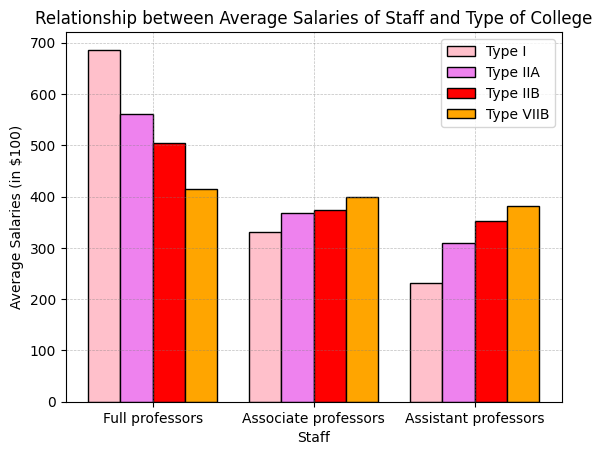

In [4]:
D= aaup.copy()
D = D[(D['avg slry - full professors'] != '*') & (D['avg slry - associate professors'] != '*') & (D['avg slry - assistant professors'] != '*') & (D['avg slry - all ranks'] != '*') & (D['avg compensation - full professors'] != '*') & (D['avg compensation - associate professors'] != '*') & (D['avg compensation - assistant professors'] != '*') & (D['avg compensation - all ranks'] != '*') & (D['#full professors'] != '*') & (D['#associate professors'] != '*') & (D['#assistant professors'] != '*')]
D['avg slry - full professors'] = D['avg slry - full professors'].astype('int64')
D['avg slry - associate professors'] = D['avg slry - associate professors'].astype('int64')
D['avg slry - assistant professors'] = D['avg slry - assistant professors'].astype('int64')
D['avg slry - all ranks'] = D['avg slry - all ranks'].astype('int64')

D['avg compensation - full professors'] = D['avg compensation - full professors'].astype('int64')
D['avg compensation - associate professors'] = D['avg compensation - associate professors'].astype('int64')
D['avg compensation - assistant professors'] = D['avg compensation - assistant professors'].astype('int64')
D['avg compensation - all ranks'] = D['avg compensation - all ranks'].astype('int64')

D['#full professors'] = D['#full professors'].astype('int64')
D['#associate professors'] = D['#associate professors'].astype('int64')
D['#assistant professors'] = D['#assistant professors'].astype('int64')

D = D.assign(ts_f_p = D['#full professors']*D['avg slry - full professors'])
D = D.assign(ts_asso_p = D['#associate professors']*D['avg slry - associate professors'])
D = D.assign(ts_assi_p = D['#assistant professors']*D['avg slry - assistant professors'])


E = D.groupby(by='type (I or IIA or IIB)')[['#full professors','#associate professors','#assistant professors','ts_f_p','ts_asso_p','ts_assi_p']].sum()

E = E.assign(a_f_p = E['ts_f_p']/E['#full professors'])
E = E.assign(a_asso_p = E['ts_asso_p']/E['#full professors'])
E = E.assign(a_assi_p = E['ts_assi_p']/E['#full professors'])
display(E)

a = E.iloc[0,6:]
b = E.iloc[1,6:]
c = E.iloc[2,6:]
d = E.iloc[3,6:]

n=3
r = np.arange(n)
width = 0.2
  
  
plt.bar(r, a, color = 'pink',width = width, edgecolor = 'black',label='Type I')
plt.bar(r + width, b, color = 'violet',width = width, edgecolor = 'black',label='Type IIA')
plt.bar(r + 2*width, c, color = 'red',width = width, edgecolor = 'black',label='Type IIB ')
plt.bar(r + 3*width, d, color = 'orange',width = width, edgecolor = 'black',label='Type VIIB')
  
plt.xlabel("Staff")
plt.ylabel("Average Salaries (in $100)")
plt.title("Relationship between Average Salaries of Staff and Type of College")
plt.xticks(r+3*width/2,['Full professors','Associate professors','Assistant professors'])
plt.grid(color='grey', linestyle='--', linewidth=0.5, alpha=0.5)
plt.legend()
plt.show()

Question 2

,#full professors,#associate professors,#assistant professors,tc_f_p,tc_asso_p,tc_assi_p,a_f_p,a_asso_p,a_assi_p
type (I or IIA or IIB),,,,,,,,,
I,60175,40886,33986,51074751,25007466,17615024,848.770270,415.578995,292.729938
IIA,34274,28083,28441,24019109,15953005,13409729,700.796785,465.455010,391.250773
IIB,15504,14367,16129,9846759,7329183,6844191,635.110875,472.728522,441.446788
VIIB,27,31,33,13716,13051,12639,508.000000,483.370370,468.111111


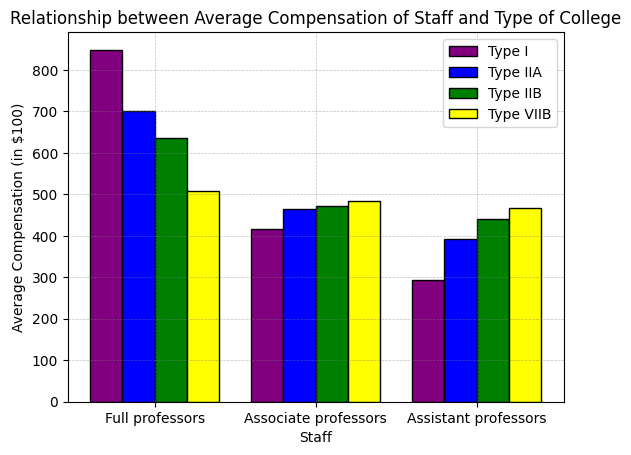

In [5]:
D= aaup.copy()
D = D[(D['avg slry - full professors'] != '*') & (D['avg slry - associate professors'] != '*') & (D['avg slry - assistant professors'] != '*') & (D['avg slry - all ranks'] != '*') & (D['avg compensation - full professors'] != '*') & (D['avg compensation - associate professors'] != '*') & (D['avg compensation - assistant professors'] != '*') & (D['avg compensation - all ranks'] != '*') & (D['#full professors'] != '*') & (D['#associate professors'] != '*') & (D['#assistant professors'] != '*')]
D['avg slry - full professors'] = D['avg slry - full professors'].astype('int64')
D['avg slry - associate professors'] = D['avg slry - associate professors'].astype('int64')
D['avg slry - assistant professors'] = D['avg slry - assistant professors'].astype('int64')
D['avg slry - all ranks'] = D['avg slry - all ranks'].astype('int64')

D['avg compensation - full professors'] = D['avg compensation - full professors'].astype('int64')
D['avg compensation - associate professors'] = D['avg compensation - associate professors'].astype('int64')
D['avg compensation - assistant professors'] = D['avg compensation - assistant professors'].astype('int64')
D['avg compensation - all ranks'] = D['avg compensation - all ranks'].astype('int64')

D['#full professors'] = D['#full professors'].astype('int64')
D['#associate professors'] = D['#associate professors'].astype('int64')
D['#assistant professors'] = D['#assistant professors'].astype('int64')

D = D.assign(tc_f_p = D['#full professors']*D['avg compensation - full professors'])
D = D.assign(tc_asso_p = D['#associate professors']*D['avg compensation - associate professors'])
D = D.assign(tc_assi_p = D['#assistant professors']*D['avg compensation - assistant professors'])

E = D.groupby(by='type (I or IIA or IIB)')[['#full professors','#associate professors','#assistant professors','tc_f_p','tc_asso_p','tc_assi_p']].sum()

E = E.assign(a_f_p = E['tc_f_p']/E['#full professors'])
E = E.assign(a_asso_p = E['tc_asso_p']/E['#full professors'])
E = E.assign(a_assi_p = E['tc_assi_p']/E['#full professors'])
display(E)

a = E.iloc[0,6:]
b = E.iloc[1,6:]
c = E.iloc[2,6:]
d = E.iloc[3,6:]

n=3
r = np.arange(n)
width = 0.2
  
plt.bar(r, a, color = 'purple',width = width, edgecolor = 'black',label='Type I')
plt.bar(r + width, b, color = 'blue',width = width, edgecolor = 'black',label='Type IIA')
plt.bar(r + 2*width, c, color = 'green',width = width, edgecolor = 'black',label='Type IIB ')
plt.bar(r + 3*width, d, color = 'yellow',width = width, edgecolor = 'black',label='Type VIIB')
  
plt.xlabel("Staff")
plt.ylabel("Average Compensation (in $100)")
plt.title("Relationship between Average Compensation of Staff and Type of College")
plt.xticks(r+3*width/2,['Full professors','Associate professors','Assistant professors'])
plt.grid(color='grey', linestyle='--', linewidth=0.5, alpha=0.5)
plt.legend()
plt.show()

Question 3

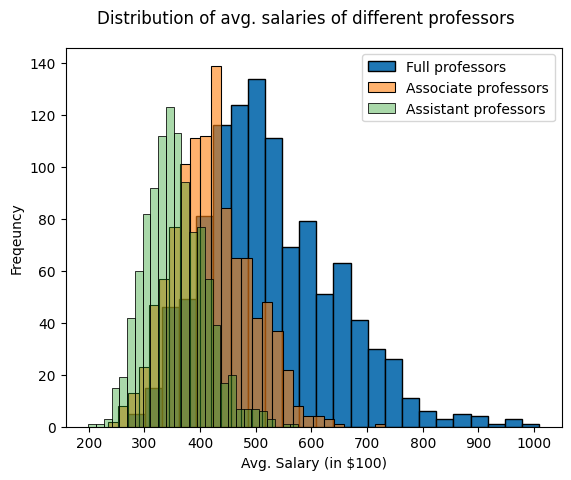

In [6]:
sns.histplot(D['avg slry - full professors'],label='Full professors',alpha=1)
sns.histplot(D['avg slry - associate professors'],label = 'Associate professors',alpha=0.6)
sns.histplot(D['avg slry - assistant professors'],label = 'Assistant professors',alpha=0.4)
plt.suptitle('Distribution of avg. salaries of different professors')
plt.subplots_adjust(top=0.9)
plt.xlabel('Avg. Salary (in $100)')
plt.ylabel('Freqeuncy')
plt.legend()

plt.show()

Question 4

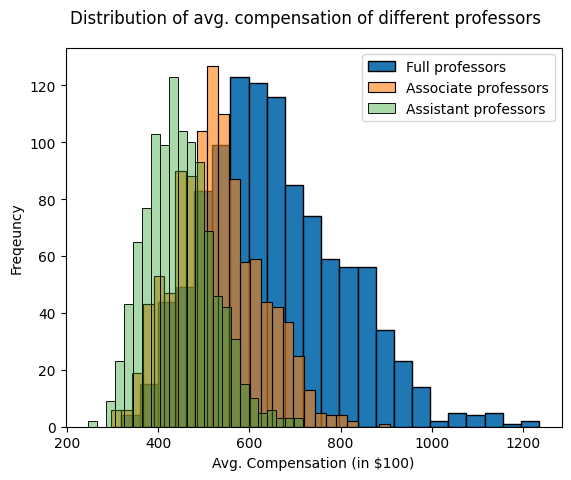

In [7]:
sns.histplot(D['avg compensation - full professors'],label='Full professors',alpha=1)
sns.histplot(D['avg compensation - associate professors'],label = 'Associate professors',alpha=0.6)
sns.histplot(D['avg compensation - assistant professors'],label = 'Assistant professors',alpha=0.4)
plt.suptitle('Distribution of avg. compensation of different professors')
plt.subplots_adjust(top=0.9)
plt.xlabel('Avg. Compensation (in $100)')
plt.ylabel('Freqeuncy')
plt.legend()

plt.show()

Question 5

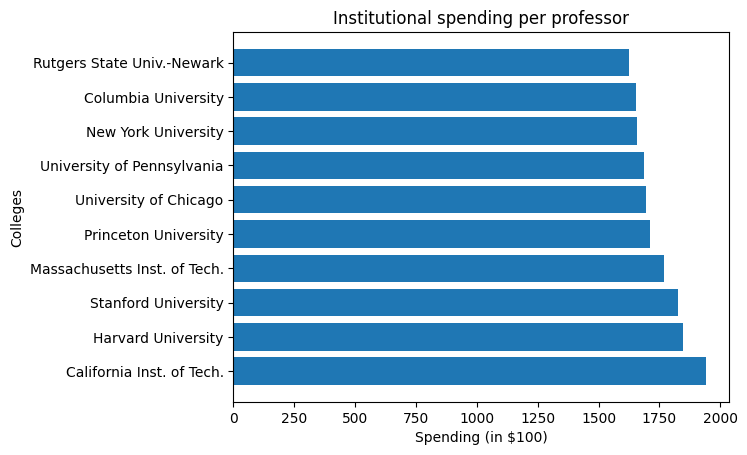

,fice,college name,state (postal code),type (I or IIA or IIB),avg slry - full professors,avg slry - associate professors,avg slry - assistant professors,avg slry - all ranks,avg compensation - full professors,avg compensation - associate professors,avg compensation - assistant professors,avg compensation - all ranks,#full professors,#associate professors,#assistant professors,#instructors,#faculty - all ranks,tse,ase
47,1131,California Inst. of Tech.,CA,I,970,733,576,866,1204,909,717,1075,173,40,44,0,257,498674,1940.365759
385,2155,Harvard University,MA,I,1009,559,500,793,1236,723,653,989,654,149,255,8,1172,1953263,1846.184310
77,1305,Stanford University,CA,I,952,658,519,824,1144,814,653,1000,533,139,145,0,834,1491716,1825.845777
388,2178,Massachusetts Inst. of Tech.,MA,I,903,637,528,757,1124,806,678,951,583,177,164,36,989,1634936,1769.411255
649,2627,Princeton University,NJ,I,963,564,437,749,1154,686,534,901,402,66,179,16,702,1107343,1711.503864
262,1774,University of Chicago,IL,I,894,586,515,742,1104,724,636,916,467,138,161,36,802,1299157,1696.027415
904,3378,University of Pennsylvania,PA,I,881,622,532,744,1086,831,712,945,541,240,212,0,993,1676595,1688.413897
708,2785,New York University,NY,I,887,591,507,683,1172,785,674,905,532,337,252,42,1231,1856712,1656.299732
679,2707,Columbia University,NY,I,882,554,452,687,1136,767,646,915,477,185,199,11,923,1425473,1655.601626
651,2631,Rutgers State Univ.-Newark,NJ,IIA,893,640,526,693,1097,812,682,871,141,125,73,16,374,550274,1623.227139


In [8]:
D= aaup.copy()
D = D[(D['avg slry - full professors'] != '*') & (D['avg slry - associate professors'] != '*') & (D['avg slry - assistant professors'] != '*') & (D['avg slry - all ranks'] != '*') & (D['avg compensation - full professors'] != '*') & (D['avg compensation - associate professors'] != '*') & (D['avg compensation - assistant professors'] != '*') & (D['avg compensation - all ranks'] != '*') & (D['#full professors'] != '*') & (D['#associate professors'] != '*') & (D['#assistant professors'] != '*')]
D['avg slry - full professors'] = D['avg slry - full professors'].astype('int64')
D['avg slry - associate professors'] = D['avg slry - associate professors'].astype('int64')
D['avg slry - assistant professors'] = D['avg slry - assistant professors'].astype('int64')

D['avg compensation - full professors'] = D['avg compensation - full professors'].astype('int64')
D['avg compensation - associate professors'] = D['avg compensation - associate professors'].astype('int64')
D['avg compensation - assistant professors'] = D['avg compensation - assistant professors'].astype('int64')

D['#full professors'] = D['#full professors'].astype('int64')
D['#associate professors'] = D['#associate professors'].astype('int64')
D['#assistant professors'] = D['#assistant professors'].astype('int64')

D = D.assign(tse = (D['avg slry - full professors']+D['avg compensation - full professors'])*D['#full professors'] + (D['avg slry - associate professors']+D['avg compensation - associate professors'])*D['#associate professors'] + (D['avg slry - assistant professors']+D['avg compensation - assistant professors'])*D['#assistant professors'])
D = D.assign(ase = D['tse']/(D['#full professors']+D['#associate professors']+D['#assistant professors']))
D = D.sort_values(by='ase',ascending=False)
plt.barh(y=D['college name'].iloc[:10],width = D['ase'].iloc[:10])
plt.title('Institutional spending per professor')
plt.xlabel('Spending (in $100)')
plt.ylabel('Colleges')
plt.show()
display(D.head(10))
